In [65]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from potosnail import Wrappers, DataHelper, Evaluater

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/spe301/healthcare-ds/main/heart.csv').drop(['Unnamed: 0'], axis='columns')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,high_col,cp_type,restecg_type
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,asymptomatic,ST-T
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,non-anginal,ventricular hypertrophy
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,atypical,ST-T
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,atypical,ventricular hypertrophy
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,typical,ventricular hypertrophy


# EDA 
1. What percentage of patients among each blood pressure zone have high cholesterol?
2. What percentage of patients who had a heart attack also have diabetes, fbs of 1, compared to those who haven't had a heart attack
3. What percentage of patients with exercise enduced chest pain have heart attacks compared to those without it? how does this vary accross age groups?
4. what percentage of patients with exercise enduced chest pain have Ventricular Hypertrophy? for context this is a condition in which the heart muscle gets too big because it has to 'work harder' in order to function.

In [3]:
normal = df.loc[df['trtbps']<120]
elevated = df.loc[df['trtbps']<130]
hypertension_1 = df.loc[df['trtbps']<140]
hypertension_2 = df.loc[df['trtbps']<180]
emergency = df.loc[df['trtbps']>180]

In [4]:
group1 = [len(normal.loc[normal['high_col']==1])/ len(normal)]
group5 = [len(emergency.loc[emergency['high_col']==1])/ len(emergency)]
nums = [120, 130, 140]
groups = [elevated, hypertension_1, hypertension_2]

In [5]:
values = []
for i in range(len(groups)):
    temp = groups[i].loc[groups[i]['trtbps']>nums[i]]
    percentage = len(temp.loc[temp['high_col']==1])/ len(temp)
    values.append(percentage)

In [6]:
values = group1 + values + group5

In [7]:
x = ['normal', 'elevated', 'hypertension_1', 'hypertension_2', 'emergency']

C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'blood pressure zone')

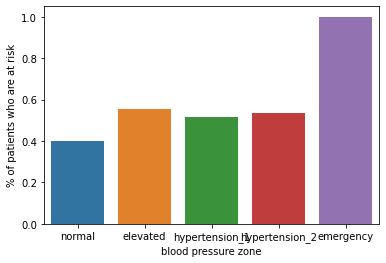

In [8]:
sns.barplot(x, values)
plt.ylabel('% of patients who are at risk')
plt.xlabel('blood pressure zone')

Conclusion: all patients with emergency level blood pressure (over 180 mm Hg) are at risk of heart attack. It's important to keep in mind that having normal blood pressure (under 120 mm Hg) dosen't get you out of the woods as 40% of these patients are still at risk.

Reccomendation: high blood pressure is an indicator of heart attack but isn't nessecarially the end all be all unless it's very high. A clinic could provide a heart health action plan for patients with blood pressure over 140 mm Hg (hypertension 2) or higher, regardless of their diagnosis. 

2. What percentage of patients who had a heart attack also have diabetes, fbs of 1, compared to those who haven't had a heart attack?

In [9]:
at_risk = df.loc[df['output']==1]
(len(at_risk.loc[at_risk['fbs']==1]) / len(at_risk))*100

13.939393939393941

In [10]:
not_risk = df.loc[df['output']==0]
(len(not_risk.loc[not_risk['fbs']==1]) / len(at_risk))*100

13.333333333333334

Conclusion: There is not a major difference; both groups are both about 13-14% diabetic. We are able to know that they are diabetic because an fbs greater than 120 means that the patient is diabetic. Diabetes, although a heart attack risk factor, dosen't seem to play as much of a role as high blood pressure.

Reccomendation: the clinic should place more emphasis on blood pressure when assessing patients than with fbs. It would be advised to measure blood pressure before fbs in order to understand the patients risk sooner. However, knowing that these two often go together we could provide diabetes prevention education to our at risk patients.

3. What percentage of patients with exercise enduced chest pain have heart attacks compared to those without it? how does this vary accross age groups?

In [11]:
chest_pain = df.loc[df['cp']==1]
len(chest_pain.loc[chest_pain['output']==1]) / len(chest_pain)

0.82

In [12]:
no_pain = df.loc[df['cp']==0]
len(no_pain.loc[no_pain['output']==1]) / len(no_pain)

0.2727272727272727

In [13]:
min(df['age']), max(df['age'])

(29, 77)

In [14]:
group1 = 0
group2 = 0
group3 = 0
group4 = 0
pos1 = 0
pos2 = 0
pos3 = 0
pos4 = 0
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
for i in range(len(df)):
    if df.loc[i]['age'] in range(29, 41):
        cnt1 += 1
        if df.loc[i]['cp'] == 1:
            group1 += 1
            if df.loc[i]['output'] == 1:
                pos1 += 1
    if df.loc[i]['age'] in range(42, 53):
        cnt2 += 1
        if df.loc[i]['cp'] == 1:
            group2 += 1
            if df.loc[i]['output'] == 1:
                pos2 += 1
    if df.loc[i]['age'] in range(54, 65):
        cnt3 += 1
        if df.loc[i]['cp'] == 1:
            group3 += 1
            if df.loc[i]['output'] == 1:
                pos3 += 1
    if df.loc[i]['age'] > 66:
        cnt4 += 1
        if df.loc[i]['cp'] == 1:
            group4 += 1
            if df.loc[i]['output'] == 1:
                pos4 += 1
                
groups = [group1, group2, group3, group4]
positives = [pos1, pos2, pos3, pos4]
counts = [cnt1, cnt2, cnt3, cnt4]

In [17]:
age_groups = ['29-41', '42-53', '54-65', '66 & up']
percentages = []
percentages2 = []
for i in range(len(groups)):
    percentages.append(groups[i]/counts[i])
    percentages2.append(positives[i]/groups[i])

C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'age group')

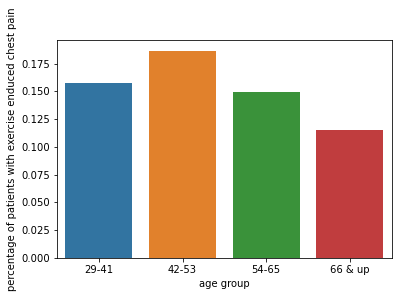

In [22]:
sns.barplot(age_groups, percentages)
plt.ylabel('percentage of patients with exercise enduced chest pain')
plt.xlabel('age group')

C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'age group')

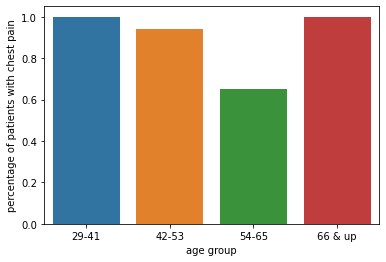

In [20]:
sns.barplot(age_groups, percentages2)
plt.title('these are our patients with exercise enduced chest pain')
plt.ylabel('percentage of patients at risk')
plt.xlabel('age group')

Conclusion: 82% of patients with excersise enduced chest pain are at risk of heart attack compared to just 17% without it. With the exception of the 54-65 age group nearly everybody with eecp are at risk

Reccomendation: even more so than high blood pressure, having excercise enduced chest pain is an indicator of being at risk. a medical practice could give their patients a small excersise test such as an aerobic actvity to see if they report chest pain of any kind.

4. what percentage of patients with exercise enduced chest pain have Ventricular Hypertrophy? for context this is a condition in which the heart muscle gets too big because it has to 'work harder' in order to function.

In [32]:
cp = df.loc[df['cp']==1]
cp_vent = cp.loc[cp['restecg_type']=='ventricular hypertrophy']
len(cp_vent) / len(cp)

0.62

C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

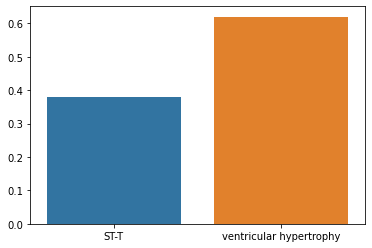

In [35]:
vent_hype = 0
STT = 0
for i in range(len(cp)):
    if cp.iloc[i]['restecg_type'] == 'ST-T':
        STT += 1
    if cp.iloc[i]['restecg_type'] == 'ventricular hypertrophy':
        vent_hype += 1
        
type_count = [STT/len(cp), vent_hype/len(cp)]
types = ['ST-T', 'ventricular hypertrophy']
sns.barplot(types, type_count)

Conclusion: within our patients who have exercise enduced chest pain 62% have ventricular hypertrophy and 38% have ST-T

Reccomendations: For patients with Left Ventricular Hypertrophy we should also check their kidney health. This is because LVH often causes the kidneys to absorb too many fluids due to a lack of bloodflow.

# Modeling

We will be predicting which patients are at risk of heart attack, I will use the potosnail library to build a prototype to iterate off of.

In [43]:
df2 = df.drop(['cp_type', 'restecg_type'], axis='columns')
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,high_col
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [48]:
results = Wrappers().WrapML(df2, 'output', 'classification', quiet=False)

raw data, baseline model: 0.9032258064516129
Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


raw data, tuned model: 0.9032258064516129
Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


data has been scaled with minmax scaler
data is not smoted, tuned model: 0.8387096774193549
Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 88 candidates, totalling 264 fits
data is not smoted, tuned model, using 9 features: 0.9032258064516129


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.7s finished


In [47]:
results

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=2, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=14,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
             0        1         2         3         7         8         9  \
 0   -0.050257  0.67420 -0.938151 -0.620790 -1.571297 -0.709057  0.288551   
 1    0.168461  0.67420  0.039539 -0.057377  0.606612 -0.709057 -0.907100   
 2   -1.471926 -1.48324  0.039539 -0.057377  0.998635 -0.709057  0.288551   
 3   -1.253208  0.67420 -0.938151  0.055306 -0.264552  1.410323 -0.821697   
 4   -0.268975  0.67420  1.994919 -0.733473  1.782682 -0.709

In [64]:
model = results[0]
train = results[1]
val = results[2]

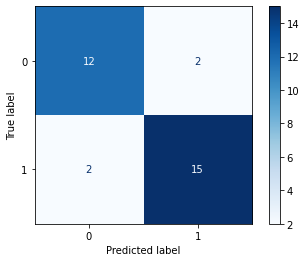

In [67]:
model.fit(train.drop(['output'], axis='columns'), train['output'])
Evaluater().BuildConfusion(model, val.drop(['output'], axis='columns'), val['output'])

In [68]:
27/31

0.8709677419354839

In [69]:
15/17

0.8823529411764706